In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from io import StringIO

In [3]:
csv_data = """A, B, C, D
              1., 2., 3., 4.
              5., 6.,,8.
              10., 11., 12."""
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

In [5]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
df.dropna(how = "all")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
df.dropna(subset = [" C"])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [10]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values="NaN", strategy = "mean", axis = 0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [20]:
df = pd.DataFrame([["green", "M", 10.1, "class1"],
                   ["red", "L", 13.5, "class2"],
                   ["blue", "XL", 15.3, "class1"]])
df.columns = ["color", "size", "price", "classlabel"]
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [21]:
size_mapping = {"XL": 3, "L": 2, "M": 1}
df["size"] = df["size"].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [22]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df["size"].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [23]:
8.8*12

105.60000000000001

In [24]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df["classlabel"]))}
class_mapping

{'class1': 0, 'class2': 1}

In [25]:
df["classlabel"] = df["classlabel"].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [26]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df.classlabel = df.classlabel.map(inv_class_mapping)

In [27]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [28]:
from sklearn.preprocessing import LabelEncoder

In [30]:
class_le = LabelEncoder()
y = class_le.fit_transform(df["classlabel"].values)
y

array([0, 1, 0])

In [31]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [32]:
X = df[["color", "size", "price"]].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe = OneHotEncoder(categorical_features = [0])
#ohe = OneHotEncoder(categories = "auto")
ohe.fit_transform(X).toarray()

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [37]:
pd.get_dummies(df[["price", "color", "size"]])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [38]:
pd.get_dummies(df[["price", "color", "size"]], drop_first = True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [39]:
ohe = OneHotEncoder(categorical_features = [0])
ohe.fit_transform(X).toarray()[:, 1:]

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [40]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
df_wine.columns = ["Class label", "Alcohol", "Malic acid", "Ash",
                   "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
                   "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
                   "OD280/OD315 of duluted wines", "Proline"]
print("Class labels", np.unique(df_wine["Class label"]))

Class labels [1 2 3]


In [41]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of duluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [46]:
ex = np.array([0,1,2,3,4,5])
print("standardized:", (ex - ex.mean()) / ex.std())
print("normalized:", (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [47]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
LogisticRegression(penalty = "l1")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
lr = LogisticRegression(penalty = "l1", C = 1., random_state = 1)
lr.fit(X_train_std, y_train)
print("Training accuracy:", lr.score(X_train_std, y_train))

Training accuracy: 1.0


/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [53]:
print("Test accuracy:", lr.score(X_test_std, y_test))

Test accuracy: 1.0


In [52]:
lr.intercept_

array([-1.26281462, -1.21588638, -2.37023311])

In [54]:
lr.coef_

array([[ 1.24511562,  0.18054757,  0.74191089, -1.1590251 ,  0.        ,
         0.        ,  1.17606363,  0.        ,  0.        ,  0.        ,
         0.        ,  0.53980207,  2.51152474],
       [-1.5368474 , -0.38730305, -0.99538117,  0.36511508, -0.05959132,
         0.        ,  0.6678969 ,  0.        ,  0.        , -1.93405944,
         1.23384296,  0.        , -2.23215641],
       [ 0.13579343,  0.16831303,  0.35719661,  0.        ,  0.        ,
         0.        , -2.43837394,  0.        ,  0.        ,  1.56382216,
        -0.81898783, -0.49224473,  0.        ]])

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logisti

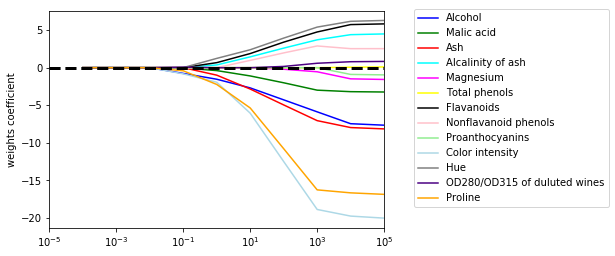

In [55]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black",
          "pink", "lightgreen", "lightblue", "gray", "indigo", "orange"]
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty = "l1", C = 10.**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label = df_wine.columns[column + 1], color = color)
plt.axhline(0, color = "black", linestyle = "--", linewidth = 3)
plt.xlim([10 ** (-5), 10**5])
plt.ylabel("weights coefficient")
plt.xscale("log")
plt.legend(loc = "upper left")
ax.legend(loc = "upper center", bbox_to_anchor = (1.38, 1.03), ncol = 1, fancybox = True)
plt.show()

In [57]:
%run -i sbs.py

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors = 5)
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)

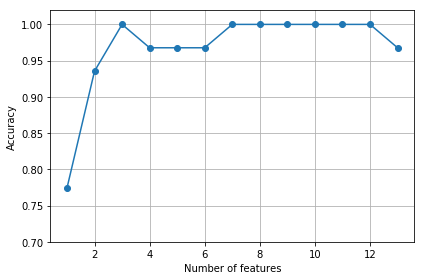

In [60]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = "o")
plt.ylim([0.7, 1.02])
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.grid()
plt.tight_layout()
plt.show()

In [61]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of duluted wines'], dtype='object')


In [62]:
knn.fit(X_train_std, y_train)
print("Training accuracy;", knn.score(X_train_std, y_train))
print("Test accuracy:", knn.score(X_test_std, y_test))

Training accuracy; 0.967741935483871
Test accuracy: 0.9629629629629629


In [63]:
knn.fit(X_train_std[:, k3], y_train)
print("Training accuracy:", knn.score(X_train_std[:, k3], y_train))
print("Test accuracy:", knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of duluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


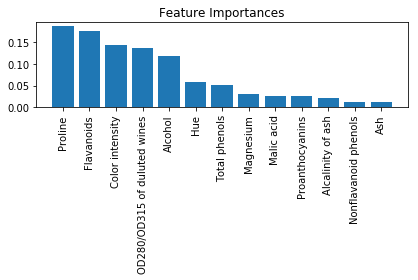

In [66]:
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align = "center")
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [68]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
X_selected = sfm.transform(X_train)
print("Number of samples that meet this criterion:", X_selected.shape[0])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of samples that meet this criterion: 124
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of duluted wines   0.136162
 5) Alcohol                        0.118529
